# GPQA-Diamond w/ Compression Analysis
### By Bryan Sukidi

## Overview

=== Overall Statistics ===
Total evaluations: 1183
Overall accuracy: 56.97%

=== Accuracy by Compression ===
                  is_correct       
                       count   mean
compression_index                  
0                        198  0.621
1                        197  0.650
2                        197  0.589
3                        197  0.553
4                        197  0.528
5                        197  0.477

=== Character Count Reduction ===
                   percent_of_original
compression_index                     
0                                100.0
1                                 55.6
2                                 42.4
3                                 33.1
4                                 24.7
5                                 14.3


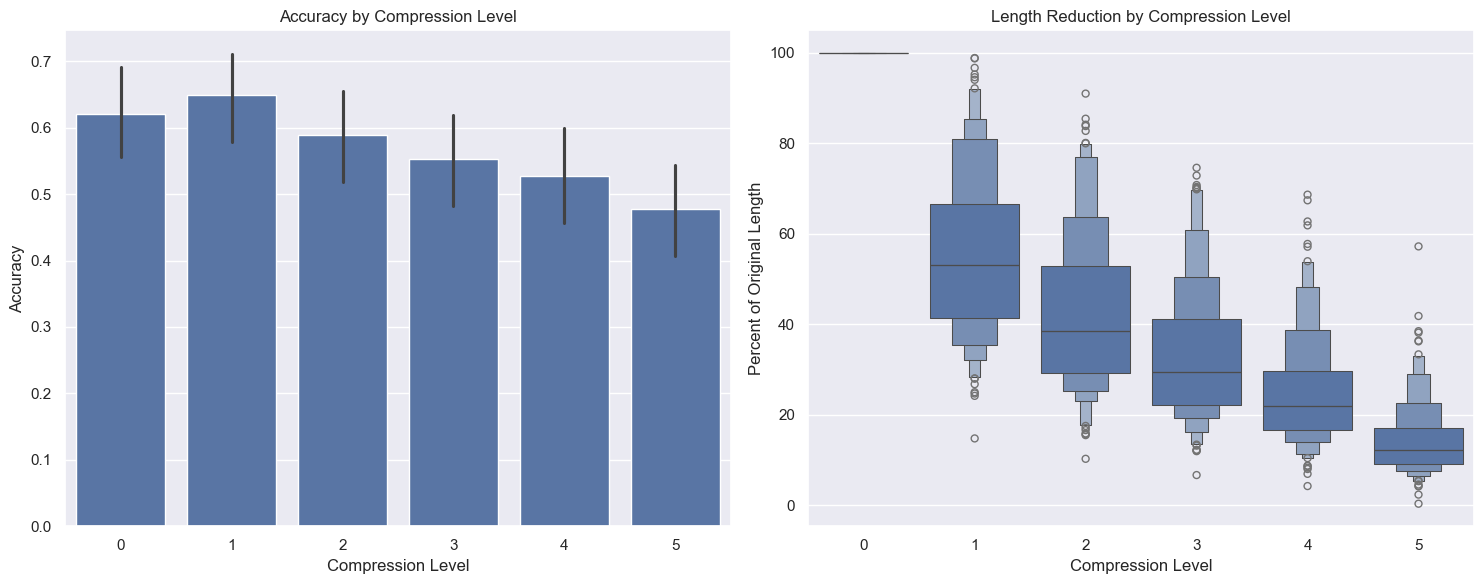

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()  

timestamp = "20250130_195708"
combined_df = pd.read_csv(f"../results/results_{timestamp}_final.csv")

# Basic statistics
print("=== Overall Statistics ===")
print(f"Total evaluations: {len(combined_df)}")
print(f"Overall accuracy: {combined_df['is_correct'].mean():.2%}")

# Accuracy by compression level
print("\n=== Accuracy by Compression ===")
compression_accuracy = combined_df.groupby('compression_index').agg({
    'is_correct': ['count', 'mean']
}).round(3)
print(compression_accuracy)

# Character count reduction
print("\n=== Character Count Reduction ===")
char_reduction = combined_df.groupby('compression_index').agg({
    'percent_of_original': 'mean'
}).round(1)
print(char_reduction)

# Summary plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Simple bar plot for accuracy with palette
sns.barplot(data=combined_df, x='compression_index', y='is_correct', ax=ax1)
ax1.set_title('Accuracy by Compression Level')
ax1.set_xlabel('Compression Level')
ax1.set_ylabel('Accuracy')

# Compression levels with palette
sns.boxenplot(data=combined_df, x='compression_index', y='percent_of_original', ax=ax2)
ax2.set_title('Length Reduction by Compression Level')
ax2.set_xlabel('Compression Level')
ax2.set_ylabel('Percent of Original Length')

plt.tight_layout()
plt.show()

In [13]:
combined_df

,record_id,compression_index,question_id,question,predicted_letter,predicted_answer,correct_letter,correct_answer,is_correct,original_char_count,compressed_char_count,percent_of_original
0,rec06pnAkLOr2t2mp,0,0,Two quantum states with energies E1 and E2 hav...,A,10^-4 eV,A,10^-4 eV,True,263,263,100.000000
1,rec06pnAkLOr2t2mp,1,0,"Two quantum states with energies E1, E2 have l...",A,10^-4 eV,A,10^-4 eV,True,263,171,65.019011
2,rec06pnAkLOr2t2mp,2,0,"Quantum states (E1, E2) with lifetimes 10^-9s ...",A,10^-4 eV,A,10^-4 eV,True,263,123,46.768061
3,rec06pnAkLOr2t2mp,3,0,States with lifetimes 10^-9s and 10^-8s - what...,A,10^-4 eV,A,10^-4 eV,True,263,88,33.460076
4,rec06pnAkLOr2t2mp,4,0,What energy gap resolves states with lifetimes...,B,10^-8 eV\n,A,10^-4 eV,False,263,65,24.714829
...,...,...,...,...,...,...,...,...,...,...,...,...
1178,reczkBiPPNrNN49Hp,1,197,In a solution with [Co(II)]=10^-2 M and [SCN-]...,A,16.9%,A,16.9%,True,380,176,46.315789
1179,reczkBiPPNrNN49Hp,2,197,"Given [Co(II)]=10^-2 M, [SCN-]=0.1 M, and β1=9...",C,25.6%,A,16.9%,False,380,130,34.210526
1180,reczkBiPPNrNN49Hp,3,197,"With [Co]=10^-2 M, [SCN-]=0.1 M, β1-4={9,40,63...",A,16.9%,A,16.9%,True,380,95,25.000000
1181,reczkBiPPNrNN49Hp,4,197,"[Co]=10^-2 M, [SCN-]=0.1 M, β2=40. Find % of d...",D,38.1%,A,16.9%,False,380,70,18.421053


## Baseline Accuracy

/var/folders/pn/ctr6tfqn77556nyp3p9v447r0000gn/T/ipykernel_32288/2501926467.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


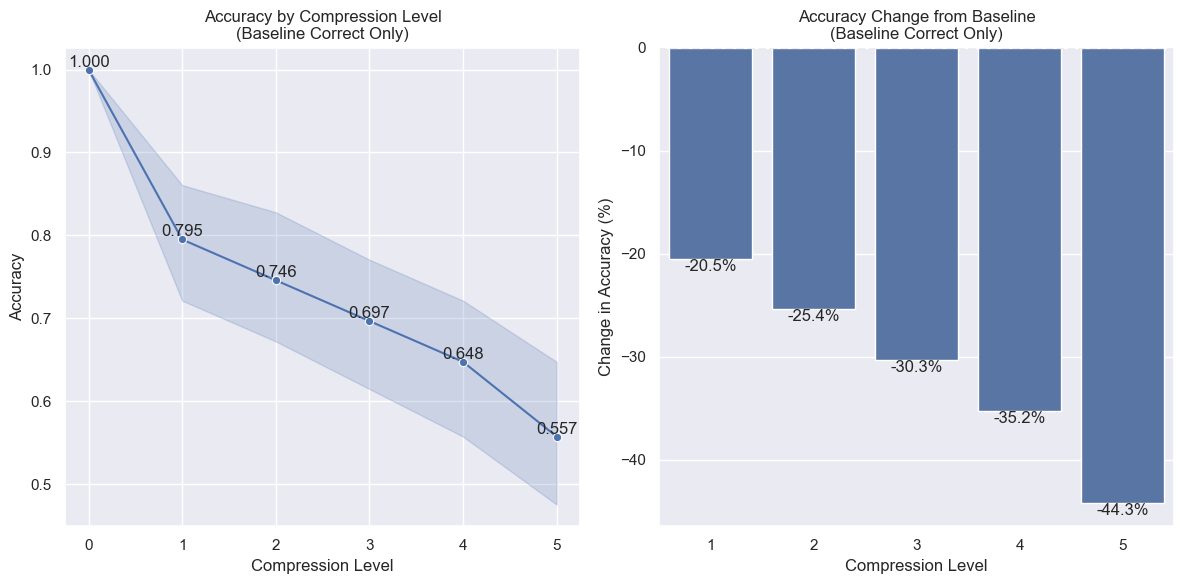


=== Performance Summary (Baseline Correct Only) ===
Number of questions correct at baseline: 123
                   Accuracy    n  Change from Baseline (%)  Avg Length (%)
compression_index                                                         
0                     1.000  123                     0.000         100.000
1                     0.795  122                   -20.492          55.666
2                     0.746  122                   -25.410          42.667
3                     0.697  122                   -30.328          33.245
4                     0.648  122                   -35.246          24.965
5                     0.557  122                   -44.262          14.739


In [14]:
# Get record_ids where baseline (compression_index 0) was correct
correct_baseline_ids = combined_df[
    (combined_df['compression_index'] == 0) & 
    (combined_df['is_correct'] == True)
]['record_id'].unique()

# Filter the dataframe for only those records
filtered_df = combined_df[combined_df['record_id'].isin(correct_baseline_ids)].copy()

# Calculate baseline accuracy and diffs for filtered dataset
baseline_accuracy = filtered_df[filtered_df['compression_index'] == 0].groupby('record_id')['is_correct'].first()
filtered_df['baseline_correct'] = filtered_df['record_id'].map(baseline_accuracy)
filtered_df['accuracy_diff'] = (filtered_df['is_correct'].astype(int) - 
                              filtered_df['baseline_correct'].astype(int)) * 100

# Create figure with two subplots
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(12, 6))

# 1. Line plot for accuracy
sns.lineplot(
    data=filtered_df,
    x='compression_index',
    y='is_correct',
    marker='o',
    ax=ax1
)
ax1.set_title('Accuracy by Compression Level\n(Baseline Correct Only)')
ax1.set_xlabel('Compression Level')
ax1.set_ylabel('Accuracy')

# Add value labels
for x, y in zip(filtered_df.groupby('compression_index')['compression_index'].first(), 
                filtered_df.groupby('compression_index')['is_correct'].mean()):
    ax1.text(x, y, f'{y:.3f}', ha='center', va='bottom')

# 2. Performance difference from baseline
sns.barplot(
    data=filtered_df[filtered_df['compression_index'] > 0],  # Exclude baseline
    x='compression_index',
    y='accuracy_diff',
    ax=ax3,
    ci=None  # Remove error bars
)
ax3.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax3.set_title('Accuracy Change from Baseline\n(Baseline Correct Only)')
ax3.set_xlabel('Compression Level')
ax3.set_ylabel('Change in Accuracy (%)')

# Add value labels on bars
for i, v in enumerate(filtered_df[filtered_df['compression_index'] > 0].groupby('compression_index')['accuracy_diff'].mean()):
    ax3.text(i, v, f'{v:.1f}%', ha='center', va='bottom' if v > 0 else 'top')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n=== Performance Summary (Baseline Correct Only) ===")
print(f"Number of questions correct at baseline: {len(correct_baseline_ids)}")
summary = filtered_df.groupby('compression_index').agg({
    'is_correct': ['mean', 'count'],
    'accuracy_diff': 'mean',
    'percent_of_original': 'mean'
}).round(3)
summary.columns = ['Accuracy', 'n', 'Change from Baseline (%)', 'Avg Length (%)']
print(summary)

## Assign length group

In [15]:
def assign_length_group(char_count):
    if char_count < 250:  
        return 'Short'
    elif char_count < 500: 
        return 'Medium'
    elif char_count < 750:  
        return 'Long'
    else:  # Multi-paragraph
        return 'Very Long'

# Define the order we want
length_order = ['Short', 'Medium', 'Long', 'Very Long']

# Add length groups to main dataframe
original_questions = combined_df[combined_df['compression_index'] == 0]
length_groups = original_questions[['record_id', 'original_char_count']].copy()
length_groups['length_group'] = pd.Categorical(
    length_groups['original_char_count'].apply(assign_length_group),
    categories=length_order,
    ordered=True
)

# Merge back to main dataframe
combined_df = combined_df.merge(length_groups[['record_id', 'length_group']], on='record_id')

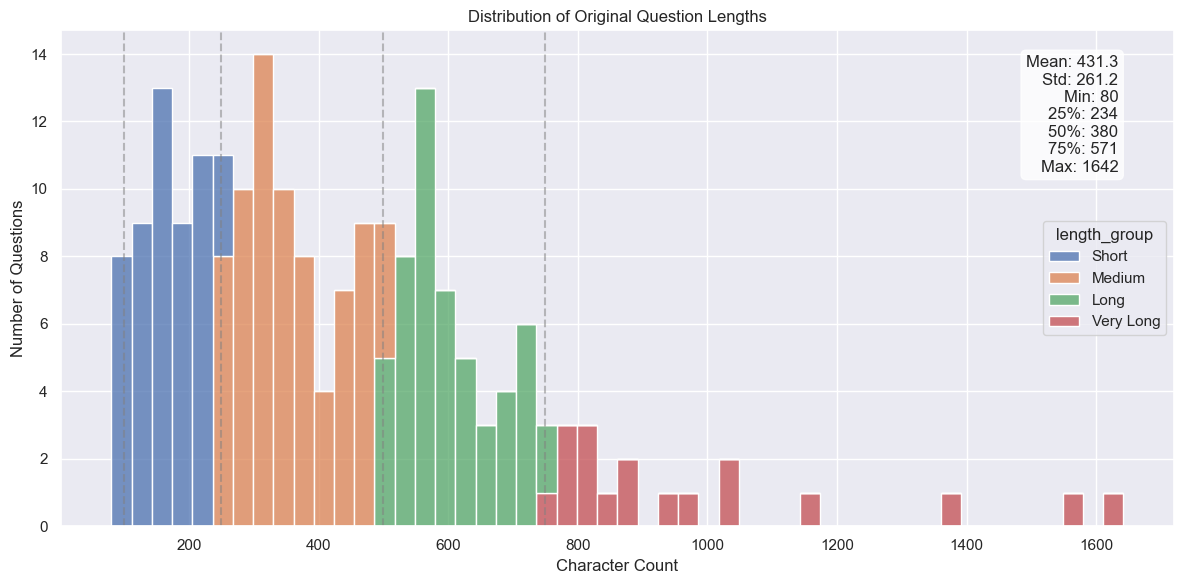

In [16]:
# Get original questions only
original_questions = combined_df[combined_df['compression_index'] == 0]

# Create histogram with length groups
plt.figure(figsize=(12, 6))

# Plot histogram with colors by length group
sns.histplot(
    data=original_questions, 
    x='original_char_count', 
    bins=50,
    hue='length_group',
    hue_order=['Short', 'Medium', 'Long', 'Very Long'],
    multiple="stack"  # Stack the bars to show total height
)

plt.title('Distribution of Original Question Lengths')
plt.xlabel('Character Count')
plt.ylabel('Number of Questions')

# Add basic statistics as text
stats = original_questions['original_char_count'].describe()
stats_text = f"Mean: {stats['mean']:.1f}\n"
stats_text += f"Std: {stats['std']:.1f}\n"
stats_text += f"Min: {stats['min']:.0f}\n"
stats_text += f"25%: {stats['25%']:.0f}\n"
stats_text += f"50%: {stats['50%']:.0f}\n"
stats_text += f"75%: {stats['75%']:.0f}\n"
stats_text += f"Max: {stats['max']:.0f}"

plt.text(0.95, 0.95, stats_text,
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add vertical lines at the cutoff points
cutoffs = [100, 250, 500, 750]
for cutoff in cutoffs:
    plt.axvline(x=cutoff, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## Find instances where index 0 wrong, index 1 correct 

In [17]:
# Filter for compression indices 0 and 1
df_01 = combined_df[combined_df['compression_index'].isin([0, 1])]

# Get length_group information
length_info = df_01[['record_id', 'length_group']].drop_duplicates()

# Pivot to compare correctness side by side
comparison_df = df_01.pivot(
    index='record_id',
    columns='compression_index',
    values=['is_correct', 'question', 'predicted_answer', 'correct_answer']
)

# Rename columns for clarity
comparison_df.columns = [
    'original_correct', 'compressed_correct',
    'original_text', 'compressed_text',
    'original_predicted', 'compressed_predicted',
    'original_correct_ans', 'compressed_correct_ans'
]

# Add length_group back to the comparison_df
comparison_df = comparison_df.join(length_info.set_index('record_id'))

# Find cases where original was wrong but compressed was right
improved_cases = comparison_df[
    (~comparison_df['original_correct']) & 
    (comparison_df['compressed_correct'])
]

print(f"\nFound {len(improved_cases)} cases where compression improved accuracy!")
print("\nAnalysis by Length Group:")
print(improved_cases.groupby('length_group').size())

print("\nDetailed Analysis:")
print("-" * 80)

for idx, row in improved_cases.iterrows():
    print(f"\nRecord ID: {idx}")
    print(f"Length Group: {row['length_group']}")
    print("\nORIGINAL VERSION (Wrong):")
    print(f"Question: {row['original_text']}")
    print(f"Predicted: {row['original_predicted']}")
    print(f"Correct: {row['original_correct_ans']}")
    
    print("\nCOMPRESSED VERSION (Correct):")
    print(f"Question: {row['compressed_text']}")
    print(f"Predicted: {row['compressed_predicted']}")
    print(f"Correct: {row['compressed_correct_ans']}")
    
    print("\n" + "-" * 80)

# Additional statistics by length group
if len(improved_cases) > 0:
    print("\nCharacter count analysis by length group:")
    char_counts = df_01[df_01['record_id'].isin(improved_cases.index)].groupby(['length_group', 'compression_index']).agg({
        'compressed_char_count': ['mean', 'min', 'max'],
        'percent_of_original': ['mean', 'min', 'max']
    }).round(2)
    print(char_counts)


Found 31 cases where compression improved accuracy!

Analysis by Length Group:
length_group
Short        11
Medium        6
Long         11
Very Long     3
dtype: int64

Detailed Analysis:
--------------------------------------------------------------------------------

Record ID: rec9GugrngvsQR99A
Length Group: Long

ORIGINAL VERSION (Wrong):
Question: Compounds that have the same molecular formula but are different in their structural arrangement are known as isomers. Isomers have two types, constitutional isomers and stereoisomers. Constitutional isomers have the same molecular formula but differ in their structures. In stereoisomers, molecules are connected in the same way, but their arrangements in space are different.
Among the given compounds (benzoquinone & cyclohexane-1,3,5-trione) the compound that does not show tautomerism (A) and among methyl 2-hydroxypropanoate and dimethyl fumarate which one will show optical isomerism (B).
Predicted: A = cyclohexane-1,3,5-trione, B = me

/var/folders/pn/ctr6tfqn77556nyp3p9v447r0000gn/T/ipykernel_32288/3376531502.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(improved_cases.groupby('length_group').size())
/var/folders/pn/ctr6tfqn77556nyp3p9v447r0000gn/T/ipykernel_32288/3376531502.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  char_counts = df_01[df_01['record_id'].isin(improved_cases.index)].groupby(['length_group', 'compression_index']).agg({


## Models often under-generate characters when compressed

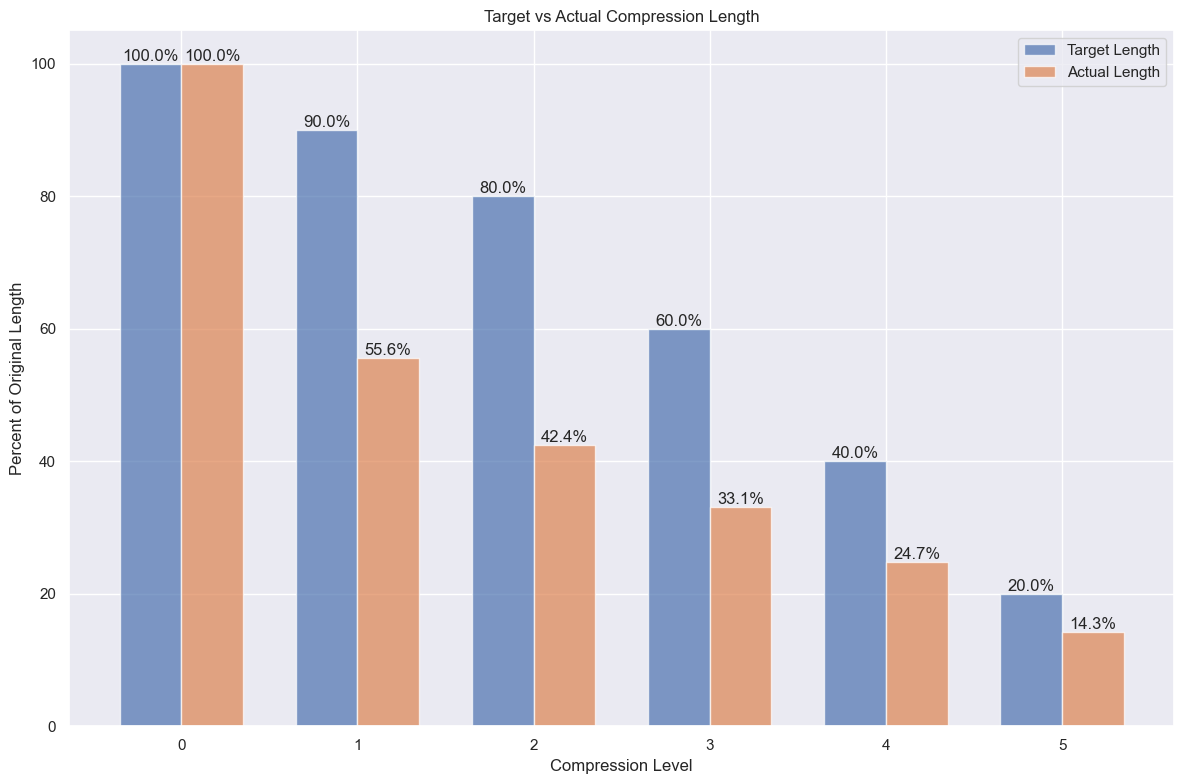

In [23]:
# Create mapping of compression index to target percent
target_map = {
    0: 100,
    1: 90,
    2: 80,
    3: 60,
    4: 40,
    5: 20
}

# Add target_percent column using map
combined_df['target_percent'] = combined_df['compression_index'].map(target_map)
combined_df['target_char_count'] = combined_df['original_char_count'] * combined_df['target_percent'] / 100

plt.figure(figsize=(12, 8))

# Simple bar plot showing average actual percent vs target percent
summary_df = combined_df.groupby('compression_index').agg({
    'target_percent': 'first',
    'percent_of_original': 'mean'
}).reset_index()

# Plot bars side by side
x = range(len(summary_df))
width = 0.35

plt.bar(x, summary_df['target_percent'], width, label='Target Length', alpha=0.7)
plt.bar([i + width for i in x], summary_df['percent_of_original'], width, label='Actual Length', alpha=0.7)

plt.title('Target vs Actual Compression Length')
plt.xlabel('Compression Level')
plt.ylabel('Percent of Original Length')
plt.legend()

# Add value labels on the bars
for i, row in summary_df.iterrows():
    plt.text(i, row['target_percent'], f"{row['target_percent']}%", ha='center', va='bottom')
    plt.text(i + width, row['percent_of_original'], f"{row['percent_of_original']:.1f}%", ha='center', va='bottom')

plt.xticks([i + width/2 for i in x], summary_df['compression_index'])



plt.tight_layout()
plt.show()

## Generate heatmaps

/var/folders/pn/ctr6tfqn77556nyp3p9v447r0000gn/T/ipykernel_32288/1715324828.py:23: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df_analysis.pivot_table(


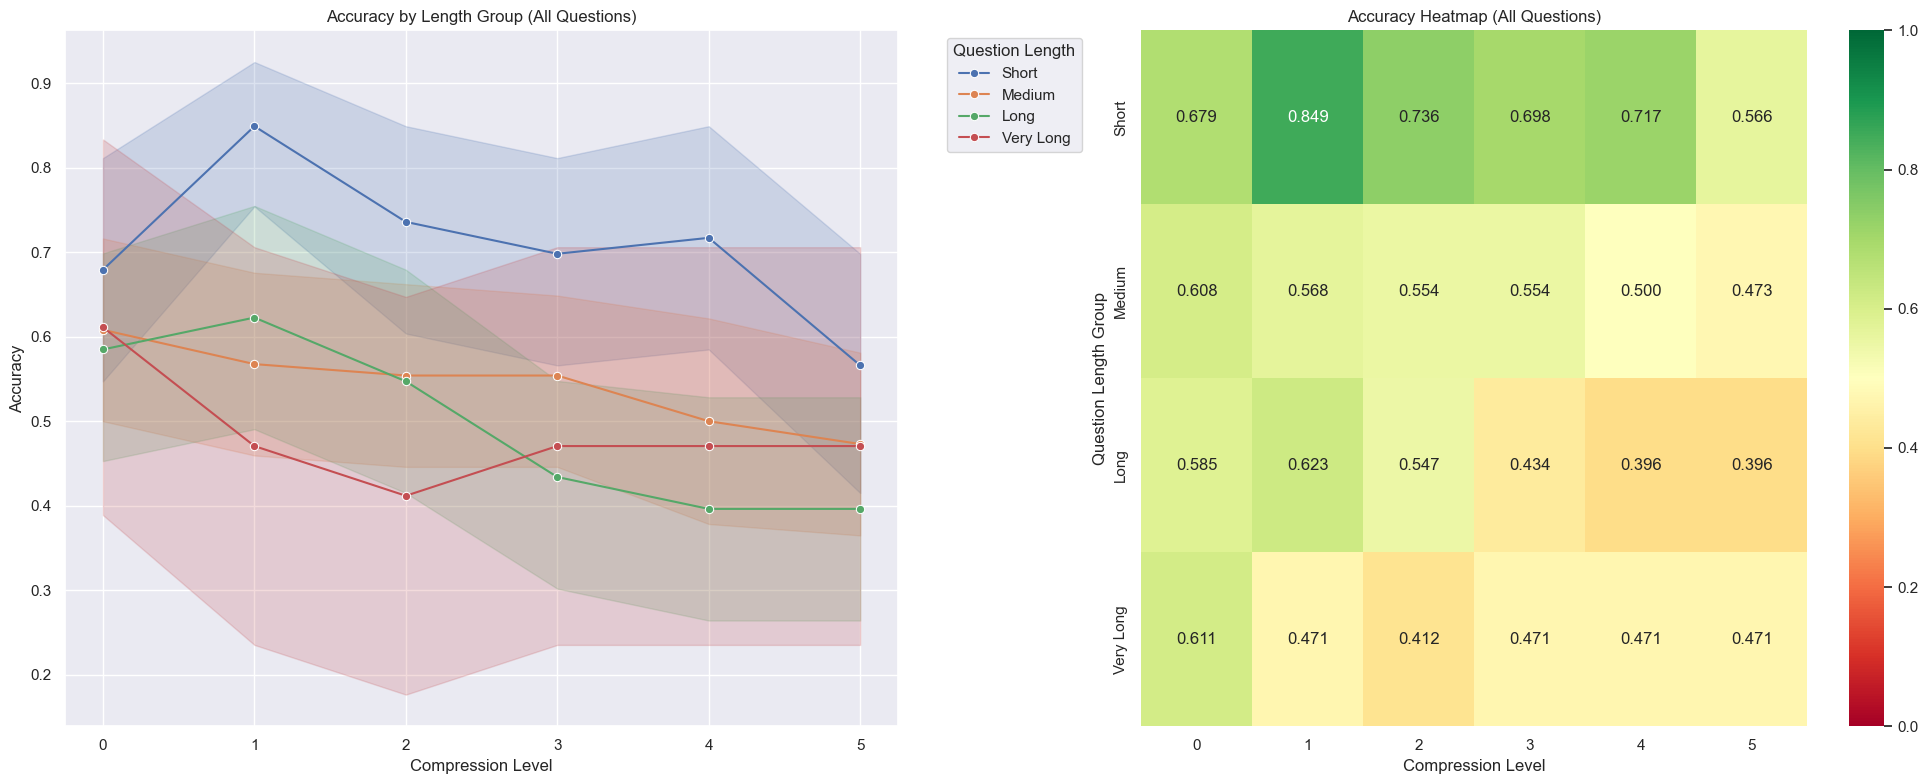

/var/folders/pn/ctr6tfqn77556nyp3p9v447r0000gn/T/ipykernel_32288/1715324828.py:73: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data_filtered = filtered_df.pivot_table(


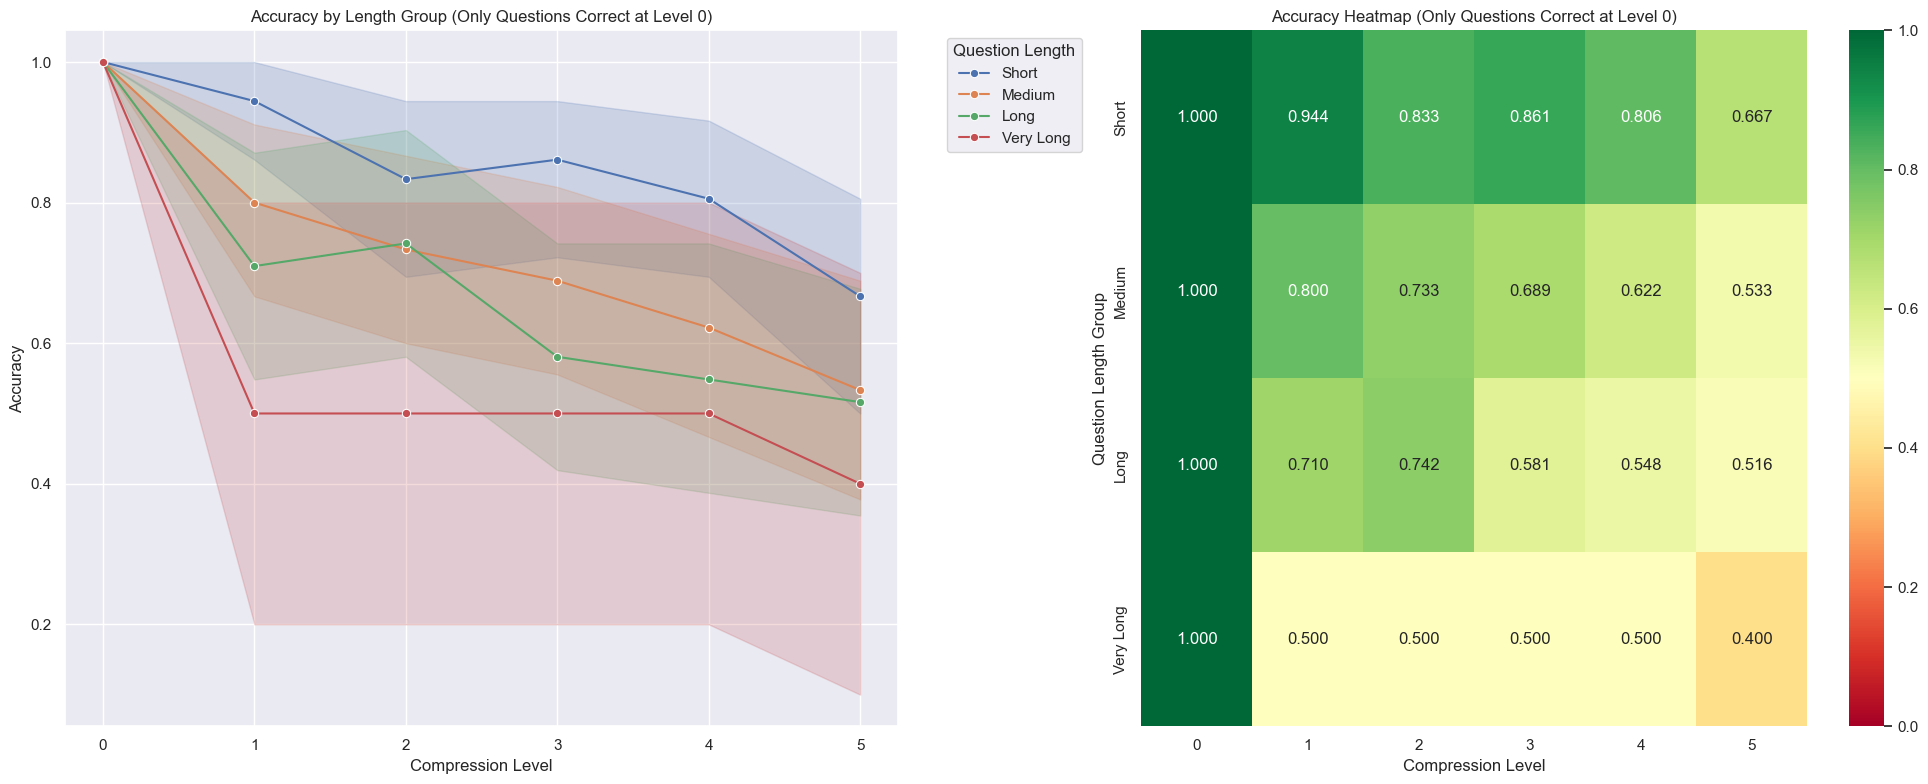

In [24]:
# Original Analysis
df_analysis = combined_df.copy()  # Create a copy for analysis

# Create figure with subplots for original analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Line plot
sns.lineplot(
    data=df_analysis,
    x='compression_index',
    y='is_correct',
    hue='length_group',
    marker='o',
    ax=ax1
)

ax1.set_title('Accuracy by Length Group (All Questions)')
ax1.set_xlabel('Compression Level')
ax1.set_ylabel('Accuracy')
ax1.legend(title='Question Length', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Heatmap
heatmap_data = df_analysis.pivot_table(
    values='is_correct',
    index='length_group',
    columns='compression_index',
    aggfunc='mean'
)

sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt='.3f', 
    cmap='RdYlGn',
    center=0.5,
    vmin=0,
    vmax=1,
    ax=ax2
)
ax2.set_title('Accuracy Heatmap (All Questions)')
ax2.set_xlabel('Compression Level')
ax2.set_ylabel('Question Length Group')
plt.tight_layout()
plt.show()

# Filtered Analysis (only questions correct at compression_index 0)
correct_at_zero = df_analysis[
    (df_analysis['compression_index'] == 0) & 
    (df_analysis['is_correct'] == True)
]['record_id'].unique()

filtered_df = df_analysis[df_analysis['record_id'].isin(correct_at_zero)].copy()

# Create figure with subplots for filtered analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Line plot for filtered data
sns.lineplot(
    data=filtered_df,
    x='compression_index',
    y='is_correct',
    hue='length_group',
    marker='o',
    ax=ax1
)

ax1.set_title('Accuracy by Length Group (Only Questions Correct at Level 0)')
ax1.set_xlabel('Compression Level')
ax1.set_ylabel('Accuracy')
ax1.legend(title='Question Length', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Heatmap for filtered data
heatmap_data_filtered = filtered_df.pivot_table(
    values='is_correct',
    index='length_group',
    columns='compression_index',
    aggfunc='mean'
)

sns.heatmap(
    heatmap_data_filtered, 
    annot=True, 
    fmt='.3f', 
    cmap='RdYlGn',
    center=0.5,
    vmin=0,
    vmax=1,
    ax=ax2
)
ax2.set_title('Accuracy Heatmap (Only Questions Correct at Level 0)')
ax2.set_xlabel('Compression Level')
ax2.set_ylabel('Question Length Group')

plt.tight_layout()
plt.show()

## Filtering Based on Correctness

Let's look specifically at the questions where the model was correct on the original.

In [26]:
# First, identify questions that were correct at compression_index 0
correct_baseline_ids = combined_df[
    (combined_df['compression_index'] == 0) & 
    (combined_df['is_correct'] == 1)
]['record_id'].unique()

# Filter to only include these questions
filtered_df = combined_df[combined_df['record_id'].isin(correct_baseline_ids)].copy()

# Calculate target percentage for each compression level
filtered_df['target_percent'] = filtered_df['percent_of_original'].round().astype(int)

# Merge with domain information
filtered_df = filtered_df.merge(
    gpqa_df[['Record ID', 'High-level domain', 'Subdomain']], 
    left_on='record_id',
    right_on='Record ID',
    how='left'
)

# Calculate performance drop for each question relative to baseline
baseline_accuracy = filtered_df[filtered_df['compression_index'] == 0].groupby('record_id')['is_correct'].first()
filtered_df['baseline_correct'] = filtered_df['record_id'].map(baseline_accuracy)
filtered_df['performance_drop'] = (filtered_df['is_correct'].astype(int) - filtered_df['baseline_correct'].astype(int)) * 100

# Calculate average performance drop by domain and compression level
performance_by_domain = filtered_df[filtered_df['compression_index'] > 0].groupby(
    ['High-level domain', 'compression_index']
)['performance_drop'].mean().round(1)

print("\nPerformance Drop by Domain and Compression Level (percentage points):")
print(performance_by_domain.unstack())

# Create visualization
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=filtered_df[filtered_df['compression_index'] > 0],
    x='compression_index',
    y='performance_drop',
    hue='High-level domain',
    marker='o'
)

plt.title('Performance Drop by Domain\n(Only Questions Correct at Baseline)')
plt.xlabel('Compression Level')
plt.ylabel('Performance Drop (percentage points)')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print additional statistics
print("\nSample sizes by domain:")
print(filtered_df[filtered_df['compression_index'] == 0].groupby('High-level domain').size())

print("\nAverage performance drop by domain (across all compression levels):")
avg_drop_by_domain = filtered_df[filtered_df['compression_index'] > 0].groupby('High-level domain')['performance_drop'].mean()
print(avg_drop_by_domain.sort_values(ascending=False).round(1))

NameError: name 'gpqa_df' is not defined

In [ ]:
# Filter for only compression_index 0
original_df = merged_df[merged_df['compression_index'] == 0]

# Total statistics
print("=== Total Statistics (Uncompressed Only) ===")
total_stats = {
    'Total Questions': len(original_df),
    'Overall Accuracy': original_df['is_correct'].mean().round(3),
    'Standard Deviation': original_df['is_correct'].std().round(3)
}
print(pd.Series(total_stats))
print("\n" + "="*50)

# High-level domain summary
print("\n=== High-Level Domain Summary (Uncompressed Only) ===")
domain_summary = original_df.groupby('High-level domain').agg({
    'record_id': 'count',  # Count of questions
    'is_correct': ['mean', 'std']  # Accuracy mean and std
}).round(3)

# Rename columns for clarity
domain_summary.columns = ['Count', 'Accuracy', 'Std']
print(domain_summary.sort_values('Count', ascending=False))

# Subdomain summary
print("\n=== Subdomain Summary (Uncompressed Only) ===")
subdomain_summary = original_df.groupby('Subdomain').agg({
    'record_id': 'count',  # Count of questions
    'is_correct': ['mean', 'std']  # Accuracy mean and std
}).round(3)

# Rename columns for clarity
subdomain_summary.columns = ['Count', 'Accuracy', 'Std']
print(subdomain_summary.sort_values('Count', ascending=False))

In [ ]:
combined_df

## Performance Difference w.r.t Question Length and Compression

In [ ]:
# Previous code remains the same until the plotting part

# Calculate sample sizes
sample_sizes = perf_diff_df[perf_diff_df['compression_index'] > 0].groupby('length_group').size()
compression_sizes = perf_diff_df[perf_diff_df['compression_index'] > 0].groupby(['length_group', 'target_percent']).size()

plt.figure(figsize=(15, 8))

# Create grouped bar plot with ci=None to remove error bars
sns.barplot(
    data=perf_diff_df[perf_diff_df['compression_index'] > 0],  # Exclude baseline
    x='length_group',
    y='performance_diff',
    hue='target_percent',
    order=['Short', 'Medium', 'Long', 'Very Long'],
    ci=None  # Remove error bars
)

plt.axhline(y=0, color='black', linestyle='-', alpha=0.2)
plt.title('Performance Difference from Baseline by Question Length and Target Length')
plt.xlabel('Question Length Group\n' + '\n'.join([f'{group}: n={n}' for group, n in sample_sizes.items()]))
plt.ylabel('Difference in Accuracy from Baseline (%)')

# Add value labels on the bars
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.1f%%', padding=3)

plt.legend(title='Compression Level', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Print summary statistics with sample sizes
print("\nAverage Performance Drop by Length Group and Compression Level:")
summary_with_n = pd.DataFrame({
    'Performance Diff': perf_diff_df[perf_diff_df['compression_index'] > 0].groupby(
        ['length_group', 'target_percent'])['performance_diff'].mean().round(1),
    'n': compression_sizes
})
print(summary_with_n)

In [ ]:
combined_df

In [ ]:
# First merge combined_df with gpqa_df to get domain information
df = combined_df.merge(
    gpqa_df[['Record ID', 'High-level domain', 'Subdomain']], 
    left_on='record_id',
    right_on='Record ID',
    how='left'
)

# Calculate baseline accuracy for each subdomain
baseline = df[df['compression_index'] == 0].groupby('Subdomain')['is_correct'].mean()

# Calculate accuracy for each subdomain and length group
accuracy = df.groupby(['Subdomain', 'length_group'])['is_correct'].mean()

# Calculate difference from baseline
differences = pd.DataFrame()
for subdomain in df['Subdomain'].unique():
    subdomain_data = accuracy[subdomain]
    baseline_acc = baseline[subdomain]
    diff = subdomain_data - baseline_acc
    differences[subdomain] = diff

# Prepare data for plotting
plot_data = differences.reset_index()
plot_data = pd.melt(
    plot_data, 
    id_vars=['length_group'], 
    var_name='Subdomain', 
    value_name='Difference'
)

# Create the plot
plt.figure(figsize=(15, 6))
sns.barplot(
    data=plot_data,
    x='Subdomain',
    y='Difference',
    hue='length_group',
    palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Use default matplotlib colors
)

# Customize the plot
plt.axhline(y=0, color='black', linestyle='-', alpha=0.2)
plt.xlabel('Subdomain')
plt.ylabel('Difference from Baseline (90-100%)')
plt.title('Performance Drop from Baseline by Subdomain')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Preserved Length')
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nBaseline accuracy by subdomain:")
print(baseline.round(3) * 100)

print("\nPerformance drop by length group and subdomain:")
print(differences.round(3))

In [22]:
# First merge combined_df with gpqa_df to get domain information
df = combined_df.merge(
    gpqa_df[['Record ID', 'High-level domain', 'Subdomain']], 
    left_on='record_id',
    right_on='Record ID',
    how='left'
)

def calculate_impact(group_col):
    # Get baseline performance (compression_index = 0)
    baseline = df[df['compression_index'] == 0].groupby(group_col)['is_correct'].mean()
    
    # Get performance at maximum compression (compression_index = max)
    max_compression_idx = df['compression_index'].max()
    max_compressed = df[df['compression_index'] == max_compression_idx].groupby(group_col)['is_correct'].mean()
    
    # Calculate absolute drop and relative drop
    absolute_drop = (baseline - max_compressed)
    relative_drop = (absolute_drop / baseline) * 100
    
    # Get sample sizes
    samples = df.groupby(group_col)['record_id'].nunique()
    
    # Combine into DataFrame
    results = pd.DataFrame({
        'Baseline Accuracy': baseline * 100,
        'Compressed Accuracy': max_compressed * 100,
        'Absolute Drop': absolute_drop * 100,
        'Relative Drop %': relative_drop,
        'Sample Size': samples
    })
    
    return results.sort_values('Absolute Drop', ascending=False)

# Calculate impact for subdomains
subdomain_impact = calculate_impact('Subdomain')

# Create visualization
plt.figure(figsize=(15, 8))

# Create bars with colors based on sample size
sample_sizes = subdomain_impact['Sample Size']
colors = plt.cm.YlOrRd(sample_sizes / sample_sizes.max())  # Color scale based on sample size

bars = plt.bar(range(len(subdomain_impact)), subdomain_impact['Absolute Drop'], color=colors)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%\n(n={int(sample_sizes[bars.index(bar)])})',
             ha='center', va='bottom' if height > 0 else 'top')

# Customize the plot
plt.title('Performance Drop by Subdomain\n(Absolute Drop from Baseline to Maximum Compression)')
plt.xlabel('Subdomain')
plt.ylabel('Absolute Performance Drop (%)')
plt.xticks(range(len(subdomain_impact)), subdomain_impact.index, rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.2)
plt.grid(True, alpha=0.2)

# Add colorbar to show sample size scale
sm = plt.cm.ScalarMappable(cmap=plt.cm.YlOrRd, norm=plt.Normalize(vmin=sample_sizes.min(), vmax=sample_sizes.max()))
cbar = plt.colorbar(sm)
cbar.set_label('Sample Size', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSubdomain Impact Analysis (sorted by absolute drop):")
print("==================================================")
print(subdomain_impact.round(2))

# Print key insights
print("\nKey Insights:")
print("=============")
print(f"1. Most impacted subdomain: {subdomain_impact.index[0]} with {subdomain_impact['Absolute Drop'][0]:.1f}% drop (n={int(subdomain_impact['Sample Size'][0])})")
print(f"2. Average drop across all subdomains: {subdomain_impact['Absolute Drop'].mean():.1f}%")
print(f"3. Number of subdomains with >20% drop: {len(subdomain_impact[subdomain_impact['Absolute Drop'] > 20])}")
print(f"4. Range of sample sizes: {sample_sizes.min()}-{sample_sizes.max()} questions per subdomain")



NameError: name 'gpqa_df' is not defined

In [11]:
# First merge combined_df with gpqa_df to get domain information
df = combined_df.merge(
    gpqa_df[['Record ID', 'High-level domain', 'Subdomain']], 
    left_on='record_id',
    right_on='Record ID',
    how='left'
)

# Calculate baseline accuracy for each domain and subdomain
baseline_domain = df[df['compression_index'] == 0].groupby('High-level domain')['is_correct'].mean()
baseline_subdomain = df[df['compression_index'] == 0].groupby('Subdomain')['is_correct'].mean()

# Calculate relative accuracy for each compression level
domain_accuracy = df.groupby(['High-level domain', 'compression_index'])['is_correct'].mean()
subdomain_accuracy = df.groupby(['Subdomain', 'compression_index'])['is_correct'].mean()

# Calculate relative performance (as a percentage of baseline)
domain_relative = pd.DataFrame()
for domain in df['High-level domain'].unique():
    domain_data = domain_accuracy[domain]
    baseline = baseline_domain[domain]
    relative = (domain_data / baseline) * 100
    domain_relative[domain] = relative

subdomain_relative = pd.DataFrame()
for subdomain in df['Subdomain'].unique():
    subdomain_data = subdomain_accuracy[subdomain]
    baseline = baseline_subdomain[subdomain]
    relative = (subdomain_data / baseline) * 100
    subdomain_relative[subdomain] = relative

# Create two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot domains
for domain in domain_relative.columns:
    ax1.plot(domain_relative.index, domain_relative[domain], marker='o', label=domain)
ax1.set_title('Relative Accuracy by Domain\n(Baseline = 100%)')
ax1.set_xlabel('Compression Level')
ax1.set_ylabel('Relative Accuracy (%)')
ax1.axhline(y=100, color='black', linestyle='--', alpha=0.3)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# Plot subdomains
for subdomain in subdomain_relative.columns:
    ax2.plot(subdomain_relative.index, subdomain_relative[subdomain], marker='o', label=subdomain)
ax2.set_title('Relative Accuracy by Subdomain\n(Baseline = 100%)')
ax2.set_xlabel('Compression Level')
ax2.set_ylabel('Relative Accuracy (%)')
ax2.axhline(y=100, color='black', linestyle='--', alpha=0.3)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nBaseline accuracy by domain:")
print(baseline_domain.round(3) * 100)
print("\nBaseline accuracy by subdomain:")
print(baseline_subdomain.round(3) * 100)

print("\nRelative accuracy at maximum compression:")
max_compression = domain_relative.index.max()
print("\nDomains:")
print(domain_relative.loc[max_compression].round(1))
print("\nSubdomains:")
print(subdomain_relative.loc[max_compression].round(1))

NameError: name 'gpqa_df' is not defined

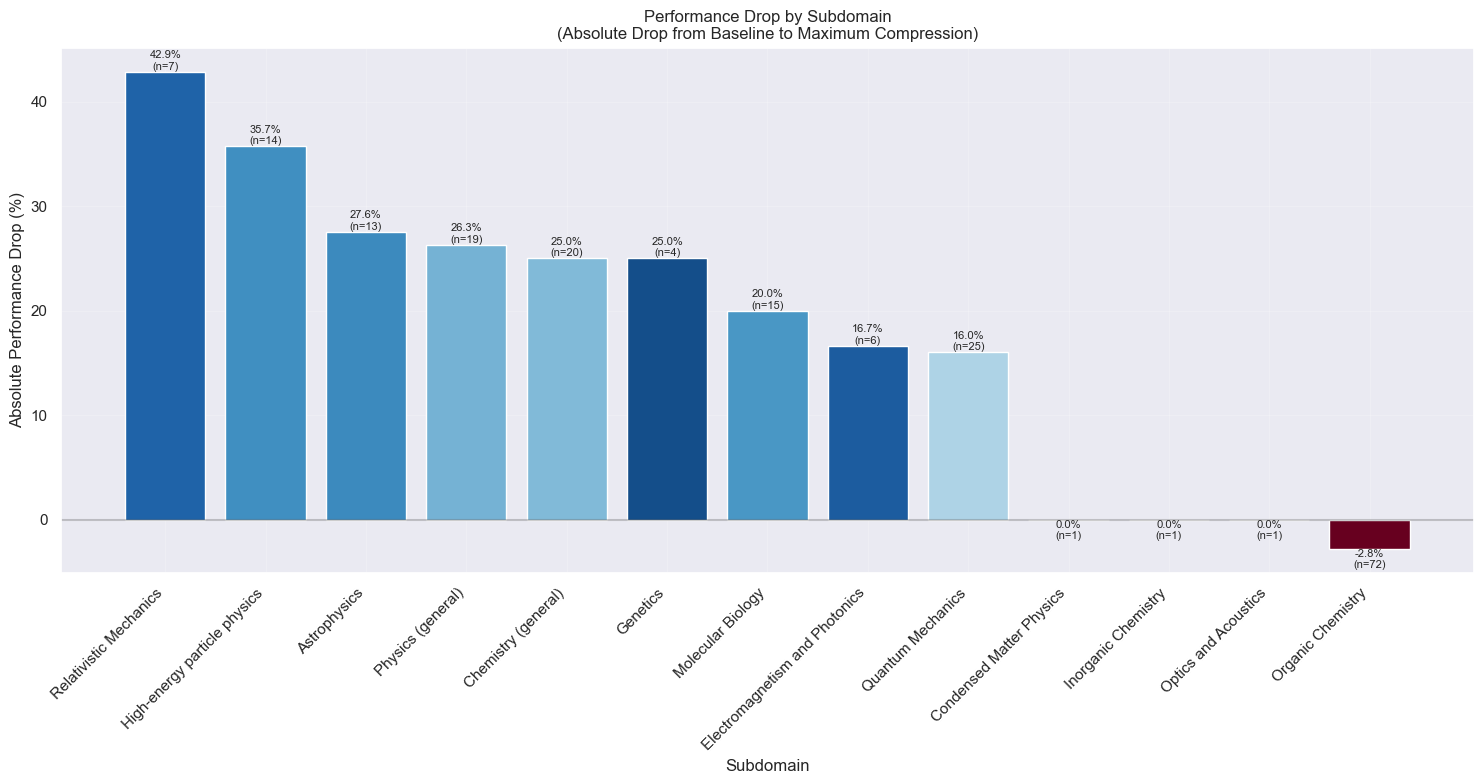


Subdomain Impact Analysis (sorted by absolute drop):
                                Baseline Accuracy  Compressed Accuracy  \
Subdomain                                                                
Relativistic Mechanics                      85.71                42.86   
High-energy particle physics                85.71                50.00   
Astrophysics                                69.23                41.67   
Physics (general)                           73.68                47.37   
Chemistry (general)                         50.00                25.00   
Genetics                                    25.00                 0.00   
Molecular Biology                           73.33                53.33   
Electromagnetism and Photonics              66.67                50.00   
Quantum Mechanics                           80.00                64.00   
Condensed Matter Physics                   100.00               100.00   
Inorganic Chemistry                          0.00         

In [38]:
# First merge combined_df with gpqa_df to get domain information
df = combined_df.merge(
    gpqa_df[['Record ID', 'High-level domain', 'Subdomain']], 
    left_on='record_id',
    right_on='Record ID',
    how='left'
)

def calculate_impact(group_col):
    # Get baseline performance (compression_index = 0)
    baseline = df[df['compression_index'] == 0].groupby(group_col)['is_correct'].mean()
    
    # Get performance at maximum compression (compression_index = max)
    max_compression_idx = df['compression_index'].max()
    max_compressed = df[df['compression_index'] == max_compression_idx].groupby(group_col)['is_correct'].mean()
    
    # Calculate absolute drop and relative drop
    absolute_drop = (baseline - max_compressed)
    relative_drop = (absolute_drop / baseline) * 100
    
    # Get sample sizes
    samples = df.groupby(group_col)['record_id'].nunique()
    
    # Combine into DataFrame
    results = pd.DataFrame({
        'Baseline Accuracy': baseline * 100,
        'Compressed Accuracy': max_compressed * 100,
        'Absolute Drop': absolute_drop * 100,
        'Relative Drop %': relative_drop,
        'Sample Size': samples
    })
    
    return results.sort_values('Absolute Drop', ascending=False)

# Calculate impact for subdomains
subdomain_impact = calculate_impact('Subdomain')

# Create visualization
plt.figure(figsize=(15, 8))

# Create bars with colors based on sample size
sample_sizes = subdomain_impact['Sample Size']
colors = plt.cm.RdBu_r(sample_sizes / sample_sizes.max())  # Changed to RdBu_r colormap

bars = plt.bar(range(len(subdomain_impact)), subdomain_impact['Absolute Drop'], color=colors)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    idx = bars.index(bar)
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%\n(n={int(sample_sizes.iloc[idx])})',
             ha='center', va='bottom' if height > 0 else 'top',
             fontsize=8)

# Customize the plot
plt.title('Performance Drop by Subdomain\n(Absolute Drop from Baseline to Maximum Compression)')
plt.xlabel('Subdomain')
plt.ylabel('Absolute Performance Drop (%)')
plt.xticks(range(len(subdomain_impact)), subdomain_impact.index, rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.2)
plt.grid(True, alpha=0.2)

# Add colorbar for sample size
sm = plt.cm.ScalarMappable(cmap=plt.cm.RdBu_r, norm=plt.Normalize(vmin=sample_sizes.min(), vmax=sample_sizes.max()))
# cbar = plt.colorbar(sm)
# cbar.set_label('Sample Size', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\nSubdomain Impact Analysis (sorted by absolute drop):")
print("==================================================")
print(subdomain_impact.round(2))

# Print key insights
print("\nKey Insights:")
print("=============")
print(f"1. Most impacted subdomain: {subdomain_impact.index[0]}")
print(f"   - Drop: {subdomain_impact['Absolute Drop'].iloc[0]:.1f}%")
print(f"   - Sample size: {int(subdomain_impact['Sample Size'].iloc[0])}")
print(f"   - Baseline accuracy: {subdomain_impact['Baseline Accuracy'].iloc[0]:.1f}%")
print(f"\n2. Average drop across all subdomains: {subdomain_impact['Absolute Drop'].mean():.1f}%")
print(f"3. Number of subdomains with >20% drop: {len(subdomain_impact[subdomain_impact['Absolute Drop'] > 20])}")
print(f"4. Total number of questions analyzed: {subdomain_impact['Sample Size'].sum()}")


In [41]:
# Filter for Relativistic Mechanics questions
rel_mech_df = df[df['Subdomain'] == 'Relativistic Mechanics'].copy()

# Add baseline performance for each question
baseline_perf = rel_mech_df[rel_mech_df['compression_index'] == 0][['record_id', 'is_correct']].set_index('record_id')
rel_mech_df['baseline_correct'] = rel_mech_df['record_id'].map(baseline_perf['is_correct'])

# Calculate performance drop for each question (convert to int for subtraction)
rel_mech_df['performance_drop'] = rel_mech_df['is_correct'].astype(int) - rel_mech_df['baseline_correct'].astype(int)

# Look at specific questions and their performance
print("Analysis of Relativistic Mechanics Questions:")
print("===========================================")
print(f"Total unique questions: {rel_mech_df['record_id'].nunique()}")
print(f"Questions correct at baseline: {len(rel_mech_df[rel_mech_df['baseline_correct'] == 1]['record_id'].unique())}")

# Look at questions that were correct at baseline but became incorrect
problematic_questions = rel_mech_df[
    (rel_mech_df['baseline_correct'] == 1) & 
    (rel_mech_df['compression_index'] > 0)
].sort_values('compression_index')

print("\nQuestions that were correct at baseline but failed under compression:")
print("================================================================")
for record_id in problematic_questions['record_id'].unique():
    question_data = rel_mech_df[rel_mech_df['record_id'] == record_id]
    baseline = question_data[question_data['compression_index'] == 0].iloc[0]
    compressed = question_data[question_data['compression_index'] > 0]
    
    print(f"\nQuestion ID: {record_id}")
    print(f"Baseline length: {baseline['percent_of_original']}%")
    print("\nCompression performance:")
    for _, row in compressed.iterrows():
        print(f"- At {row['percent_of_original']}% length: {'Correct' if row['is_correct'] else 'Incorrect'}")

# Compare with other physics questions
physics_df = df[df['High-level domain'] == 'Physics'].copy()
print("\nComparison with other Physics subdomains:")
print("=======================================")
for subdomain in physics_df['Subdomain'].unique():
    subdomain_data = physics_df[physics_df['Subdomain'] == subdomain]
    n_questions = subdomain_data['record_id'].nunique()
    
    if n_questions > 0:  # Only show subdomains with questions
        baseline_acc = subdomain_data[subdomain_data['compression_index'] == 0]['is_correct'].mean()
        max_comp_acc = subdomain_data[subdomain_data['compression_index'] == subdomain_data['compression_index'].max()]['is_correct'].mean()
        
        print(f"\n{subdomain}:")
        print(f"- Sample size: {n_questions} questions")
        print(f"- Baseline accuracy: {baseline_acc*100:.1f}%")
        print(f"- Max compression accuracy: {max_comp_acc*100:.1f}%")
        print(f"- Absolute drop: {(baseline_acc - max_comp_acc)*100:.1f}%")

# Look at average question lengths
print("\nAverage original question lengths by physics subdomain:")
print("=================================================")
baseline_physics = physics_df[physics_df['compression_index'] == 0]
for subdomain in baseline_physics['Subdomain'].unique():
    avg_length = baseline_physics[baseline_physics['Subdomain'] == subdomain]['percent_of_original'].mean()
    n_questions = len(baseline_physics[baseline_physics['Subdomain'] == subdomain])
    if n_questions > 0:  # Only show subdomains with questions
        print(f"{subdomain} (n={n_questions}): {avg_length:.1f}%")

# Print example of a relativistic mechanics question
print("\nExample of a Relativistic Mechanics question that failed under compression:")
print("====================================================================")
if len(problematic_questions) > 0:
    example = problematic_questions.iloc[0]
    print(f"Question ID: {example['record_id']}")
    print(f"Original length: {example['percent_of_original']}%")
    if 'predicted_answer' in example and 'correct_answer' in example:
        print(f"Predicted answer: {example['predicted_answer']}")
        print(f"Correct answer: {example['correct_answer']}")

Analysis of Relativistic Mechanics Questions:
Total unique questions: 7
Questions correct at baseline: 6

Questions that were correct at baseline but failed under compression:

Question ID: recIIUynGGpsGEYuo
Baseline length: 100.0%

Compression performance:
- At 67.88079470198676% length: Correct
- At 44.70198675496689% length: Correct
- At 35.099337748344375% length: Correct
- At 22.8476821192053% length: Correct
- At 12.91390728476821% length: Incorrect

Question ID: recmkvk6EFAmqyMxR
Baseline length: 100.0%

Compression performance:
- At 42.281879194630875% length: Incorrect
- At 30.87248322147651% length: Incorrect
- At 19.23937360178971% length: Incorrect
- At 11.185682326621924% length: Incorrect
- At 7.158836689038031% length: Incorrect

Question ID: rec0VuKUjt1SZ7NYv
Baseline length: 100.0%

Compression performance:
- At 65.4639175257732% length: Correct
- At 53.608247422680414% length: Correct
- At 54.63917525773196% length: Correct
- At 21.1340206185567% length: Correct
- At 

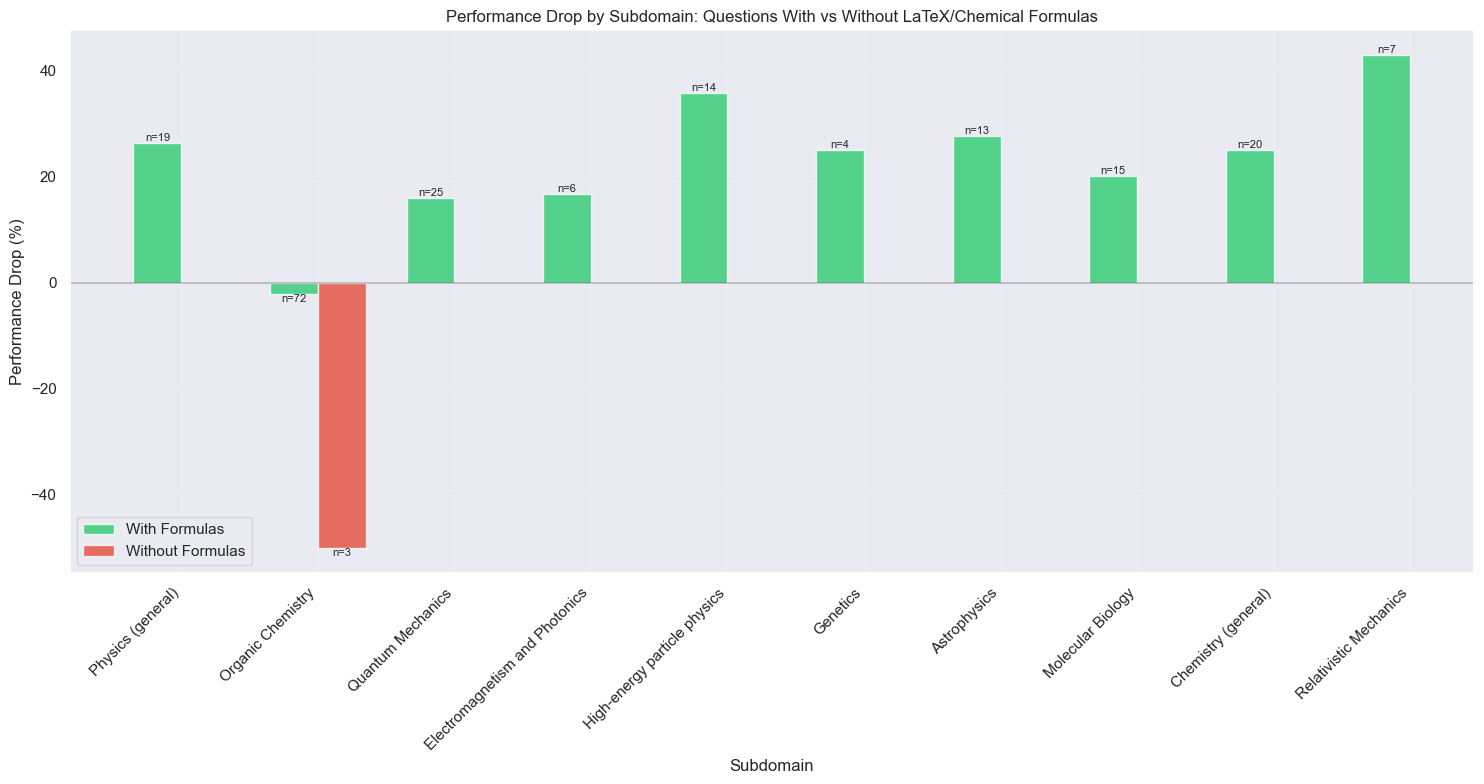


Detailed Analysis:

Physics (general):

With Formulas:
- Sample size: 19
- Baseline accuracy: 73.7%
- Compressed accuracy: 47.4%
- Absolute drop: 26.3%

Organic Chemistry:

With Formulas:
- Sample size: 72
- Baseline accuracy: 48.6%
- Compressed accuracy: 50.7%
- Absolute drop: -2.1%

Without Formulas:
- Sample size: 3
- Baseline accuracy: 50.0%
- Compressed accuracy: 100.0%
- Absolute drop: -50.0%

Quantum Mechanics:

With Formulas:
- Sample size: 25
- Baseline accuracy: 80.0%
- Compressed accuracy: 64.0%
- Absolute drop: 16.0%

Electromagnetism and Photonics:

With Formulas:
- Sample size: 6
- Baseline accuracy: 66.7%
- Compressed accuracy: 50.0%
- Absolute drop: 16.7%

High-energy particle physics:

With Formulas:
- Sample size: 14
- Baseline accuracy: 85.7%
- Compressed accuracy: 50.0%
- Absolute drop: 35.7%

Genetics:

With Formulas:
- Sample size: 4
- Baseline accuracy: 25.0%
- Compressed accuracy: 0.0%
- Absolute drop: 25.0%

Astrophysics:

With Formulas:
- Sample size: 13
- Ba

In [48]:
import re

def has_latex_or_chemical(text):
    # LaTeX patterns (inline and display math)
    latex_patterns = [
        r'\$.*?\$',           # Inline math $...$
        r'\\\[.*?\\\]',       # Display math \[...\]
        r'\\\(.*?\\\)',       # Inline math \(...\)
    ]
    
    # Chemical formula patterns
    chemical_patterns = [
        r'[A-Z][a-z]?\d*',    # Basic elements with numbers (e.g., H2, Na2)
        r'\([A-Za-z0-9]+\)',  # Grouped elements (e.g., (OH))
        r'→',                 # Arrow in reactions
        r'[+=→↔]'            # Common reaction symbols
    ]
    
    # Combine all patterns
    all_patterns = latex_patterns + chemical_patterns
    
    # Check if any pattern matches
    for pattern in all_patterns:
        if re.search(pattern, str(text)):
            return True
    return False

# Add flag for questions with LaTeX/chemical content
df['has_formula'] = df['question'].apply(has_latex_or_chemical)

# Calculate impact for each subdomain and formula presence
results = []
for subdomain in df['Subdomain'].unique():
    subdomain_data = df[df['Subdomain'] == subdomain]
    
    for has_formula in [True, False]:
        # Filter data
        filtered_data = subdomain_data[subdomain_data['has_formula'] == has_formula]
        
        if len(filtered_data) > 0:  # Only process if we have data
            # Get baseline and compressed accuracies
            baseline_acc = filtered_data[filtered_data['compression_index'] == 0]['is_correct'].mean()
            max_comp_idx = filtered_data['compression_index'].max()
            compressed_acc = filtered_data[filtered_data['compression_index'] == max_comp_idx]['is_correct'].mean()
            
            # Calculate sample size
            sample_size = filtered_data['record_id'].nunique()
            
            if not pd.isna(baseline_acc) and not pd.isna(compressed_acc) and sample_size >= 3:
                results.append({
                    'Subdomain': subdomain,
                    'has_formula': 'With Formulas' if has_formula else 'Without Formulas',
                    'absolute_drop': (baseline_acc - compressed_acc) * 100,
                    'baseline_acc': baseline_acc * 100,
                    'compressed_acc': compressed_acc * 100,
                    'sample_size': sample_size
                })

# Convert to DataFrame
impact_df = pd.DataFrame(results)

# Create the visualization
plt.figure(figsize=(15, 8))

# Get unique subdomains that have data
subdomains = impact_df['Subdomain'].unique()

# Create positions for bars
x = np.arange(len(subdomains))
width = 0.35

# Plot bars for each group
for i, formula_group in enumerate(['With Formulas', 'Without Formulas']):
    mask = impact_df['has_formula'] == formula_group
    if sum(mask) > 0:  # Only plot if we have data
        data = impact_df[mask]
        
        # Create a mapping of subdomains to their drops
        drops = [data[data['Subdomain'] == sub]['absolute_drop'].iloc[0] 
                if len(data[data['Subdomain'] == sub]) > 0 else np.nan 
                for sub in subdomains]
        
        # Create a mapping of subdomains to their sample sizes
        sizes = [data[data['Subdomain'] == sub]['sample_size'].iloc[0] 
                if len(data[data['Subdomain'] == sub]) > 0 else 0 
                for sub in subdomains]
        
        # Plot bars
        bars = plt.bar(x + (i-0.5)*width, drops, width, 
                      label=formula_group,
                      color='#2ecc71' if formula_group == 'With Formulas' else '#e74c3c',
                      alpha=0.8)
        
        # Add sample size annotations
        for idx, (drop, size) in enumerate(zip(drops, sizes)):
            if not np.isnan(drop) and size > 0:
                plt.text(x[idx] + (i-0.5)*width, drop,
                        f'n={size}',
                        ha='center',
                        va='bottom' if drop > 0 else 'top',
                        fontsize=8)

# Customize the plot
plt.xlabel('Subdomain')
plt.ylabel('Performance Drop (%)')
plt.title('Performance Drop by Subdomain: Questions With vs Without LaTeX/Chemical Formulas')
plt.xticks(x, subdomains, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.2)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.2)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed Analysis:")
print("=================")
for subdomain in impact_df['Subdomain'].unique():
    print(f"\n{subdomain}:")
    subdomain_data = impact_df[impact_df['Subdomain'] == subdomain]
    for _, row in subdomain_data.iterrows():
        print(f"\n{row['has_formula']}:")
        print(f"- Sample size: {row['sample_size']}")
        print(f"- Baseline accuracy: {row['baseline_acc']:.1f}%")
        print(f"- Compressed accuracy: {row['compressed_acc']:.1f}%")
        print(f"- Absolute drop: {row['absolute_drop']:.1f}%")